PENTE :

Vitesse apres les 31 m: 18.31920893001399 m/s


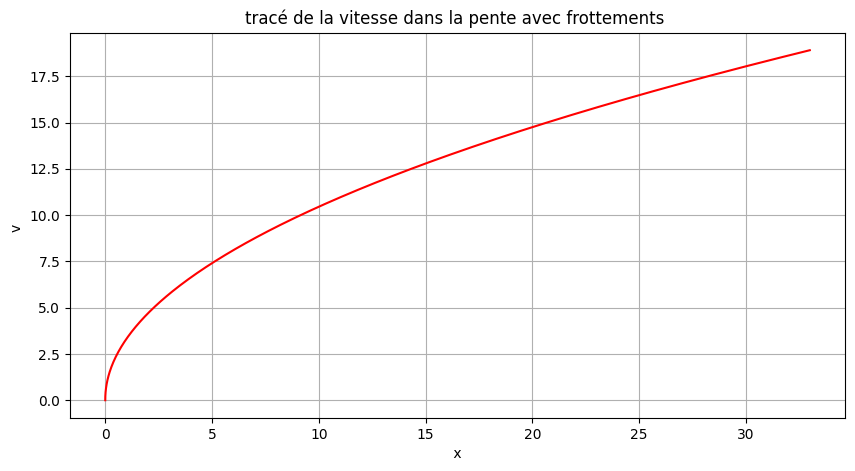

In [10]:
import numpy as np
import matplotlib.pyplot as plt

m = 1540 #masse de la voiture
u = 0.1 #coefficient de frottement
g = 9.8
k = 0.8 #coefficient de portance
alpha = 0.063
dt = 0.01 # delta t
tF =  3.5 #Temps final
Vx0= 0
vx = [Vx0] #  tabeau des Vx


t = np.arange(0, tF, dt) # axe du temps

#declaration de la fonction differentielle renvoyant à la vitesse sur l'axe x
def dvxdt(vx,g,alpha):
    expression1 = g * (np.sin(alpha) - u * np.cos(alpha))
    expression3 = 5.81
    V=  (expression1 - (0.5*k * (vx ** 2) / m )+ expression3)
    return  V



#Resolution avec la methode d'Euler
for i in range(0, int(tF/dt)-1):
    vx.append(vx[i]+dvxdt(vx[i],g,alpha)*dt)
    #initialisation des variables
x0 = 0


#génération du tableau
x_f = [x0]


#Résolution avec méthode numérique aussi appelée Euler
for i in range(0, int(tF/dt)-1):
    x_f.append(x_f[i] + vx[i]*dt)

distance_cible = 31  # Distance à laquelle vous souhaitez connaître la vitesse

# Recherche de l'indice correspondant à la distance cible
indice_cible = np.abs(np.array(x_f) - distance_cible).argmin()

# Affichage de la vitesse à cette distance
vitesse_cible = vx[indice_cible]
print("Vitesse apres les", distance_cible , "m:", vitesse_cible , "m/s")

plt.figure(figsize=(10,5),)
plt.plot(x_f,vx, 'red')
plt.xlabel(" x ")
plt.ylabel("v ")
plt.title("tracé de la vitesse dans la pente avec frottements ")
plt.grid()

LOOPING :

Vitesse initiale : 18.31 m.s^-1 | Vitesse finale : 20.517 m.s^-1


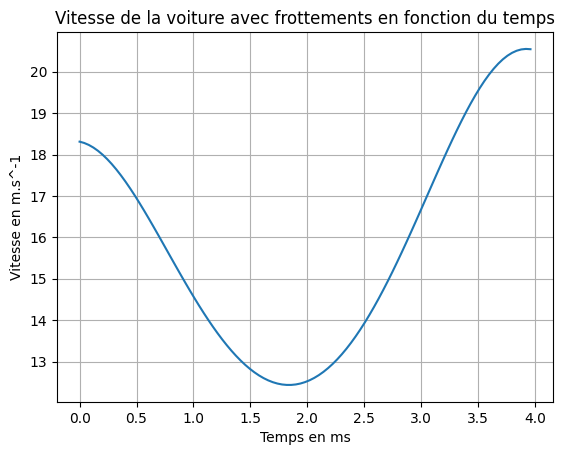

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import *
from scipy.integrate import odeint
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from pylab import *

# Looping  #
################################################################################################################
donnees = {
    "m": 1540 ,        # Masse de la voiture en kg
    "g": 10,        # Accélération gravitationnelle en m/s^2
    "mu": 0.1,        # Coefficient de frottement
    "r": 6,           # Rayon du looping en mètres
    "k": 0.8,       # Paramètre supplémentaire
    "t0": 0,          # Temps initial
    "tmax": 2.35,       # Temps maximal
    "pas": 100      # Nombre de points pour la discrétisation temporelle
}


v_plat_af1 = 18.31  # Vitesse initiale de la voiture en m/s


#Equation de mouvement à résoudre avec 'odeint'
def equation(y, t):
    calcul = (5.8*1540+donnees["m"]*donnees["g"]*(-np.sin(y[0])-donnees["mu"]*np.cos(y[0]))-y[1]**2*(donnees["mu"]*donnees["m"]*donnees["r"]+donnees["k"]*donnees["r"]**2))/(donnees["m"]*donnees["r"])
    return [y[1], calcul]


#vecteur temps
t = np.linspace(donnees["t0"],donnees["tmax"],donnees["pas"])

#Calcul vitesse angulaire (teta prime) en rad/s^-1
omega=v_plat_af1/donnees["r"]

#Résolution
y = odeint(equation, [0,omega], t)
#Savoir quand est-ce qu'on dépasse 2pi, ce qui correspond à la voiture à la fin du looping
i = 0

while i < len(y) and y[i-1][1] < 2*np.pi:
    i += 1


v_looping_af = y[i-1][1]*donnees["r"]

print("Vitesse initiale : " + str(round(v_plat_af1, 3)) + " m.s^-1 | Vitesse finale : " + str(round(v_looping_af, 3)) + " m.s^-1")

t = np.linspace(donnees["t0"],4,donnees["pas"]) # Création d'une liste contenant le temps entre 0 et 4 avec 1000 valeur

#Tracer des résultats
#Vitesse de la voiture avec frottements en fonction du temps
plt.plot(t[0:i-1],y[0:i-1,1]*donnees["r"])

# Titre plus nom des axes
plt.title("Vitesse de la voiture avec frottements en fonction du temps")
plt.xlabel("Temps en ms") #  Notation de l'axe x
plt.ylabel("Vitesse en m.s^-1") #  Notation de l'axe y
plt.grid()
plt.show() #Affichage

# Résolution
y = odeint(equation, [0, omega], t)


SAUT DANS LE RAVIN :

Pour y = -1 mètre on a X : 9.389475884559843 M
Pour x = 9 mètres on a Y : -0.9741689518412254 M
Pour x = 9 mètres on a T : 0.45 S
Pour x = 9 mètres on a V : 20.313693031944947 M/S


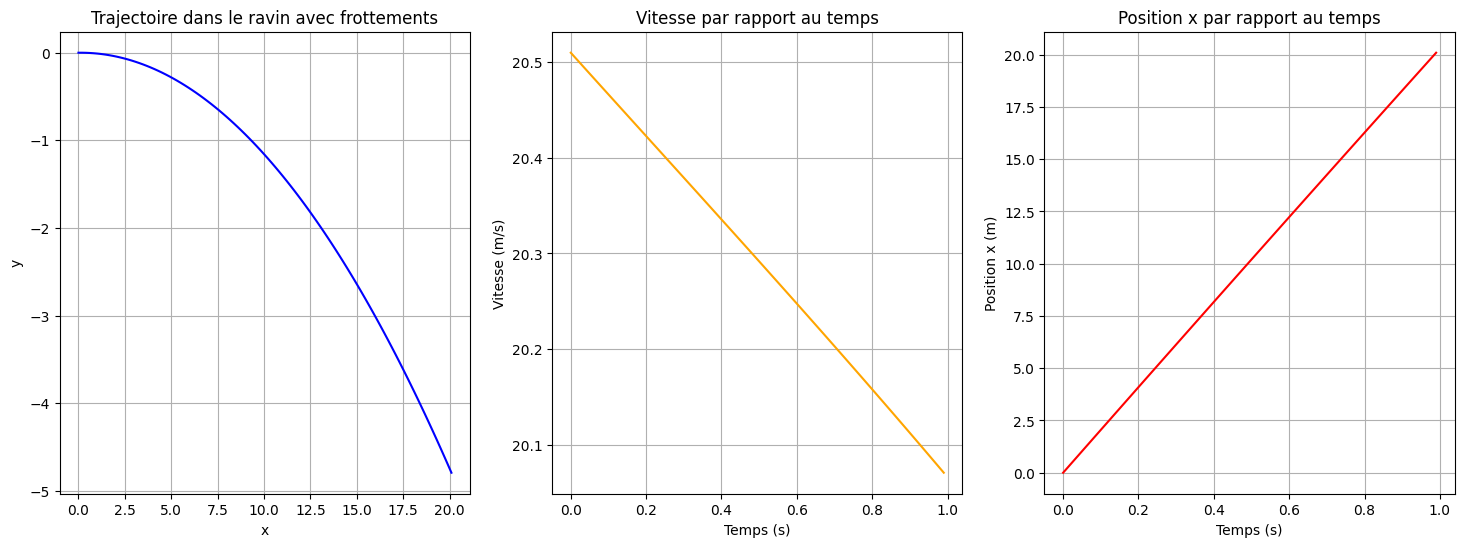

In [29]:
import numpy as np
import matplotlib.pyplot as plt

m = 1540  # masse de la voiture
cx = 0.8  # coefficient de traînée
g = 9.81
cy = 2.4  # coefficient de portance
dt = 0.01  # delta t
tF = 1  # Temps final
Vsl_f = 20.51  # la vitesse en sortie du looping avec frottements
Vx0 = Vsl_f
vy0 = 0  # vitesse initiale sur y
vx = [Vx0]  # tableau des Vx
vy = [vy0]  # tableau des Vy
t = np.arange(0, tF, dt)  # axe du temps

# Déclaration de la fonction différentielle renvoyant à la vitesse sur l'axe x
def dvxdt(vx, vy):
    return (-(1 / 2 * cx * np.sqrt(vx ** 2 + vy ** 2) * vx + (1 / 2) * cy * np.sqrt(vx ** 2 + vy ** 2) * vx)) / m

# Déclaration de la fonction différentielle renvoyant à la vitesse sur l'axe y
def dvydt(vx, vy):
    return (-g + (1 / 2 * cx * np.sqrt(vx ** 2 + vy ** 2) * vy + 1 / 2 * cy * np.sqrt(vx ** 2 + vy ** 2) * vy) / m)

# Resolution avec la methode d'Euler
for i in range(0, int(tF / dt) - 1):
    vx.append(vx[i] + dvxdt(vx[i], vy[i]) * dt)
    vy.append(vy[i] + dvydt(vx[i], vy[i]) * dt)

# Initialisation des variables pour la trajectoire
x0 = 0
y0 = 0

# Génération des tableaux pour la trajectoire
x_f = [x0]
y_f = [y0]

# Resolution avec méthode numérique (Euler)
for i in range(0, int(tF / dt) - 1):
    x_f.append(x_f[i] + vx[i] * dt)
    y_f.append(y_f[i] + vy[i] * dt)

# Recherche de l'indice es
indice_x_9 = np.argmax(np.array(x_f) >= 9)
indice_t_9 = np.argmax(np.array(x_f) >= 9)
indice_y_minus_1 = np.argmax(np.array(y_f) <= -1)

# Affichage de la valeur correspondante
x_minus_1 = x_f[indice_y_minus_1]
y_9 = y_f[indice_x_9]
t_9 = t[indice_x_9]
v_9 = vx[indice_t_9]
# Affichage de la valeur de x lorsque y = -1 mètre et la valeur de y lorsque x = 9 mètres
print("Pour y = -1 mètre on a X :", x_minus_1,"M")
print("Pour x = 9 mètres on a Y :", y_9,"M")
print("Pour x = 9 mètres on a T :", t_9,"S")
print("Pour x = 9 mètres on a V :", v_9,"M/S")

# Affichage de la trajectoire dans le ravin avec frottements
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Trajectoire
axs[0].plot(x_f, y_f, 'blue')
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].set_title("Trajectoire dans le ravin avec frottements")
axs[0].grid()

# Vitesse par rapport au temps
axs[1].plot(t, vx, 'orange')
axs[1].set_xlabel("Temps (s)")
axs[1].set_ylabel("Vitesse (m/s)")
axs[1].set_title("Vitesse par rapport au temps")
axs[1].grid()

# Vitesse par rapport au temps (graphique 2)
axs[2].plot(t, x_f, 'red')
axs[2].set_xlabel("Temps (s)")
axs[2].set_ylabel("Position x (m)")
axs[2].set_title("Position x par rapport au temps")
axs[2].grid()

plt.show()

FIN DE PISTE :

La valeur de la vitesse lorsque x = 10 mètres : 22.810665540543766
La valeur de t lorsque x = 10 mètres : 0.47000000000000003


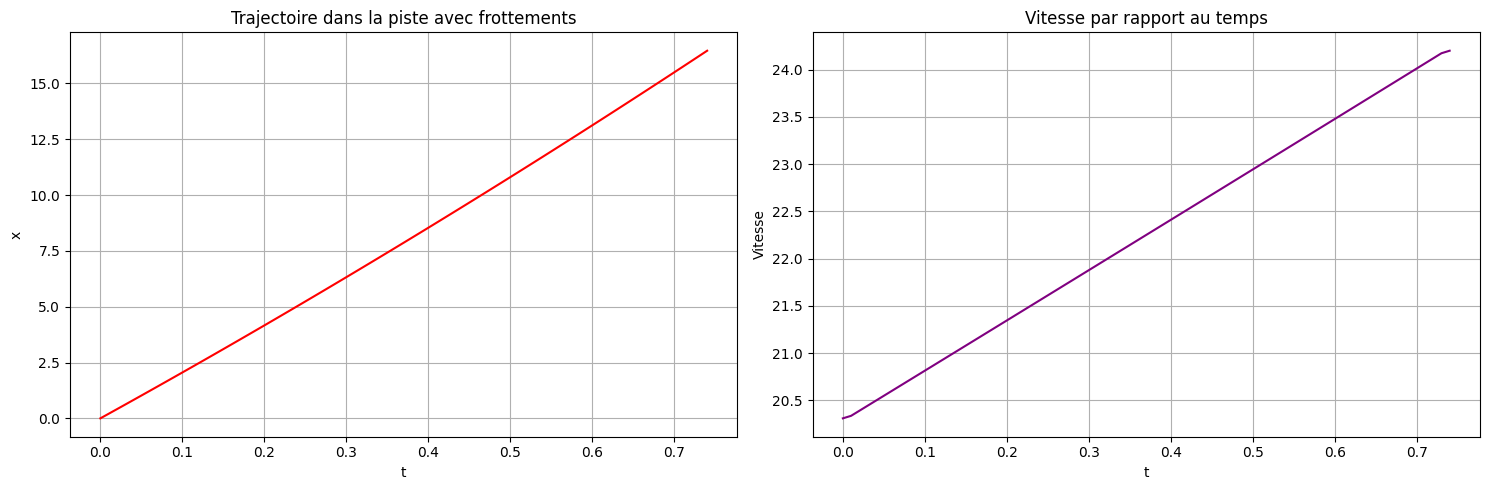

In [32]:
import numpy as np
import matplotlib.pyplot as plt

m = 1540  # masse de la voiture
k = 0.8
dt = 0.01  # delta t
tF = 0.75  # Temps final
Vx0 = 20.31
vx = [Vx0]  # tableau des Vx

t = np.arange(0, tF, dt)  # axe du temps

# Déclaration de la fonction différentielle renvoyant à la vitesse sur l'axe x  
def dvxdt(vx):
    expression3 = 5.2
    V = ((0.5 * k * (vx ** 2) / m) + expression3)
    return V

# Résolution avec la methode d'Euler
for i in range(0, int(tF / dt) - 1):
    vx.append(vx[i] + dvxdt(vx[i]) * dt)

# Initialisation des variables pour la trajectoire
x0 = 0

# Génération du tableau pour la trajectoire
x_f = [x0]

# Résolution avec méthode numérique (Euler)
for i in range(0, int(tF / dt) - 1):
    x_f.append(x_f[i] + vx[i] * dt)

# Recherche de l'indice où x_f atteint 10 mètres
indice_x_10 = np.argmax(np.array(x_f) >= 10)

# Affichage de la valeur correspondante de la vitesse
vitesse_x_10 = vx[indice_x_10]

# Calcul de la valeur de t lorsque x = 10 mètres
temps_x_10 = indice_x_10 * dt

print("La valeur de la vitesse lorsque x = 10 mètres :", vitesse_x_10)
print("La valeur de t lorsque x = 10 mètres :", temps_x_10)

# Création de la figure
plt.figure(figsize=(15, 5))

# Tracé de la trajectoire dans la piste avec frottements
plt.subplot(1, 2, 1)
plt.plot(t, x_f, 'red')
plt.xlabel("t")
plt.ylabel("x")
plt.title("Trajectoire dans la piste avec frottements")
plt.grid()

# Calcul de la vitesse en fonction du temps
vitesse_temps = np.gradient(x_f, t)

# Tracé de la vitesse par rapport au temps
plt.subplot(1, 2, 2)
plt.plot(t, vitesse_temps, 'purple')
plt.xlabel("t")
plt.ylabel("Vitesse")
plt.title("Vitesse par rapport au temps")
plt.grid()

# Affichage des graphiques
plt.tight_layout()
plt.show()